## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用虚拟数据来实验
np.random.seed(666)

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0.0, 100.0, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0.0, 10.0, size=100)

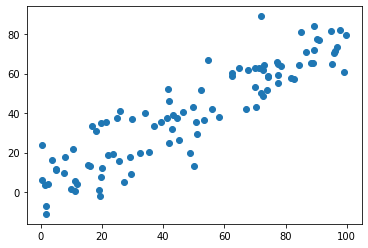

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## demean

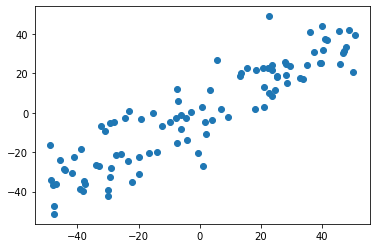

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [5]:
# 验证一下均值是否归零了：
np.mean(X_demean[:,0])

-7.958078640513123e-15

In [6]:
np.mean(X_demean[:,1])

1.4921397450962105e-14

## 梯度上升法

In [7]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

In [8]:
def df_math(w, X):
    result = X.T.dot(X.dot(w)) * 2.0 / len(X)
    
    print('df_math =', result)
    return result

In [9]:
def df_debug(w, X, epsilon=0.0001):
    result = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        result[i] = (f(w_1, X) - f(w_2, X)) / (epsilon * 2)
       
    print('df_debug =', result)
    return result

In [10]:
# 定义一个求单位向量的方法
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, init_w, eta, n_iters=1e4, epsilon=1e-8):
    i_iters = 0
    w = direction(init_w)
    
    while i_iters < n_iters:
        last_w = w
        gradient = df(w, X)
        w = last_w + eta * gradient
        w = direction(w)             # 注意1：每次求一个单位向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break

        i_iters += 1
    print("i_iters =", i_iters)
    return w

In [11]:
# 注意2：初始值不能为0，0点的梯度为0，代表最小值，我们这里要求最大值
init_w = np.random.random(X.shape[1])

In [12]:
eta = 0.001

In [13]:
# 注意3：不能使用 StandardScaler 标准化数据， 否则它的方差就是1了， 方差的最大值就不存在了。

In [14]:
w = gradient_ascent(df_debug, X_demean, init_w, eta)
w

df_debug = [1935.45609715 1659.75019661]
df_debug = [2254.34968582 1858.21000951]
df_debug = [2294.44146983 1869.81074511]
df_debug = [2299.93798572 1868.16121459]
df_debug = [2301.00289152 1867.27077236]
df_debug = [2301.26604688 1866.98110355]
df_debug = [2301.33803678 1866.89521476]
df_debug = [2301.35839549 1866.87035253]
df_debug = [2301.36421025 1866.86320372]
df_debug = [2301.36587581 1866.86115209]
df_debug = [2301.36635329 1866.86056362]
i_iters = 10


array([0.77660882, 0.62998313])

In [17]:
w = gradient_ascent(df_math, X_demean, init_w, eta)
w

df_math = [1935.45609715 1659.75019661]
df_math = [2254.34968582 1858.21000951]
df_math = [2294.44146983 1869.8107451 ]
df_math = [2299.93798571 1868.16121459]
df_math = [2301.00289152 1867.27077237]
df_math = [2301.26604687 1866.98110355]
df_math = [2301.33803678 1866.89521476]
df_math = [2301.35839549 1866.87035253]
df_math = [2301.36421025 1866.86320372]
df_math = [2301.36587581 1866.86115209]
df_math = [2301.36635329 1866.86056362]
i_iters = 10


array([0.77660882, 0.62998313])

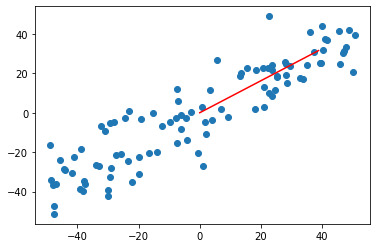

In [20]:
# 看看得到的这个轴，是什么方向：
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 50], [0, w[1] * 50], color='r')
plt.show()

In [ ]:
# 这就是第一个主成分